### **PREDIKSI PENYAKIT JANTUNG**



```
# This is formatted as code
```

**LATAR BELAKANG**

Penyakit jantung adalah salah satu penyebab kematian utama di seluruh dunia, dan prediksi dini serta pemahaman faktor risiko dapat membantu dalam pencegahan dan pengelolaannya.

Dataset ini diperoleh dari UCI Machine Learning Repository. Dataset ini dirancang untuk mempelajari hubungan antara berbagai atribut klinis dan faktor risiko dengan keberadaan penyakit jantung pada pasien.

Atribut-atribut dalam dataset mencakup faktor-faktor seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, dan sejumlah variabel lain yang dapat memberikan wawasan tentang risiko penyakit jantung. Penggunaan dataset semacam ini biasanya melibatkan pengembangan model prediktif yang menggunakan machine learning untuk mengidentifikasi pola yang berkorelasi dengan keberadaan penyakit jantung.

**TUJUAN**



1. Membangun model prediktif untuk memprediksi risiko atau keberadaan penyakit jantung berdasarkan atribut pasien.

2. mengidentifikasi faktor-faktor risiko utama yang berkaitan dengan penyakit jantung.
3. meningkatkan pemahaman tentang hubungan antara variabel-variabel klinis tertentu dan penaykit jantung.

**DATASET**

Dataset yang digunakan adalah data pasien dari daerah Amerika Serikat,Hungaria dan Switzerland dengan berbagai atribut yang terkait dengan kondisi kesehatan.

Data ini didapat dari website https://archive.ics.uci.edu/dataset/45/heart+disease.


Atribut terdiri dari :

1.age: Usia pasien dalam tahun.

2.sex: Jenis kelamin pasien (1 = laki-laki, 0 = perempuan).

3.cp: Jenis nyeri dada (chest pain type) dengan kategori dari 0 hingga 3.

4.trestbps: Tekanan darah istirahat dalam mm Hg (tekanan darah yang diukur ketika pasien dalam kondisi istirahat).

5.chol: Kadar kolesterol serum dalam mg/dl.

6.fbs: Kadar gula darah puasa (0 = < 120 mg/dl, 1 = > 120 mg/dl).

7.restecg: Hasil elektrokardiografi saat istirahat (nilai 0, 1, atau 2).

8.thalach: Detak jantung maksimum yang dicapai.

9.exang: Angina yang disebabkan oleh olahraga (1 = ya, 0 = tidak).

10.oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.

11.slope: Kemiringan segmen ST (nilai 0, 1, atau 2).

12.ca: Jumlah pembuluh darah utama (0-3) yang diwarnai dengan fluoroskopi.

13..thal: Thalassemia (3 = normal, 6 = cacat tetap, 7 = cacat reversibel).

14..target: Diagnosis penyakit jantung (0 = tidak ada penyakit jantung, 1 = ada penyakit jantung).



**Import Library & load Dataset**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

NumPy dan Pandas: Untuk manipulasi data numerik dan DataFrame.

Matplotlib dan Seaborn: Untuk visualisasi data.

Scikit-learn: Untuk pembelajaran mesin (GaussianNB), pembagian data (train_test_split), dan evaluasi model (accuracy_score, classification_report, confusion_matrix, metrics).

**Eksplorasi Dataset**

In [93]:
data = pd.read_csv('/content/Data.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Terdapat 2 Jenis tipe data,yaitu float64 dan int64.

In [95]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Informasi yang didapat :

Usia:

Rata-rata: 54,43 tahun, rentang: 29-77 tahun.

Jenis Kelamin:

Mayoritas laki-laki (rata-rata: 0,696).

Jenis Nyeri Dada:

Rata-rata: 0,942, rentang: 0-3.

Tekanan Darah Istirahat:

Rata-rata: 131,61 mm Hg, rentang: 94-200 mm Hg(milimeter air raksa (merkuri)).

Kolesterol:

Rata-rata: 246 mg/dl, rentang: 126-564 mg/dl(miligram per desiliter).

Gula Darah Puasa:

Mayoritas di bawah 120 mg/dl (rata-rata: 0,149).

Hasil Elektrokardiografi:

Rata-rata: 0,530, rentang: 0-2.

Detak Jantung Maksimum:

Rata-rata: 149,11 bpm, rentang: 71-202 bpm.

Angina yang Disebabkan oleh Olahraga:

Mayoritas tidak mengalami (rata-rata: 0,337).

Depresi ST:

Rata-rata: 1,072, rentang: 0-6,2.

Kemiringan Segmen ST:

Rata-rata: 1,385, rentang: 0-2.

Jumlah Pembuluh Darah yang Diwarnai:

Rata-rata: 0,754, rentang: 0-4.

Thalassemia:

Rata-rata: 2,324, rentang: 0-3.

Diagnosis Penyakit Jantung:

Sebagian besar seimbang antara ada dan tidak ada penyakit (rata-rata: 0,513).

<Figure size 1200x600 with 0 Axes>

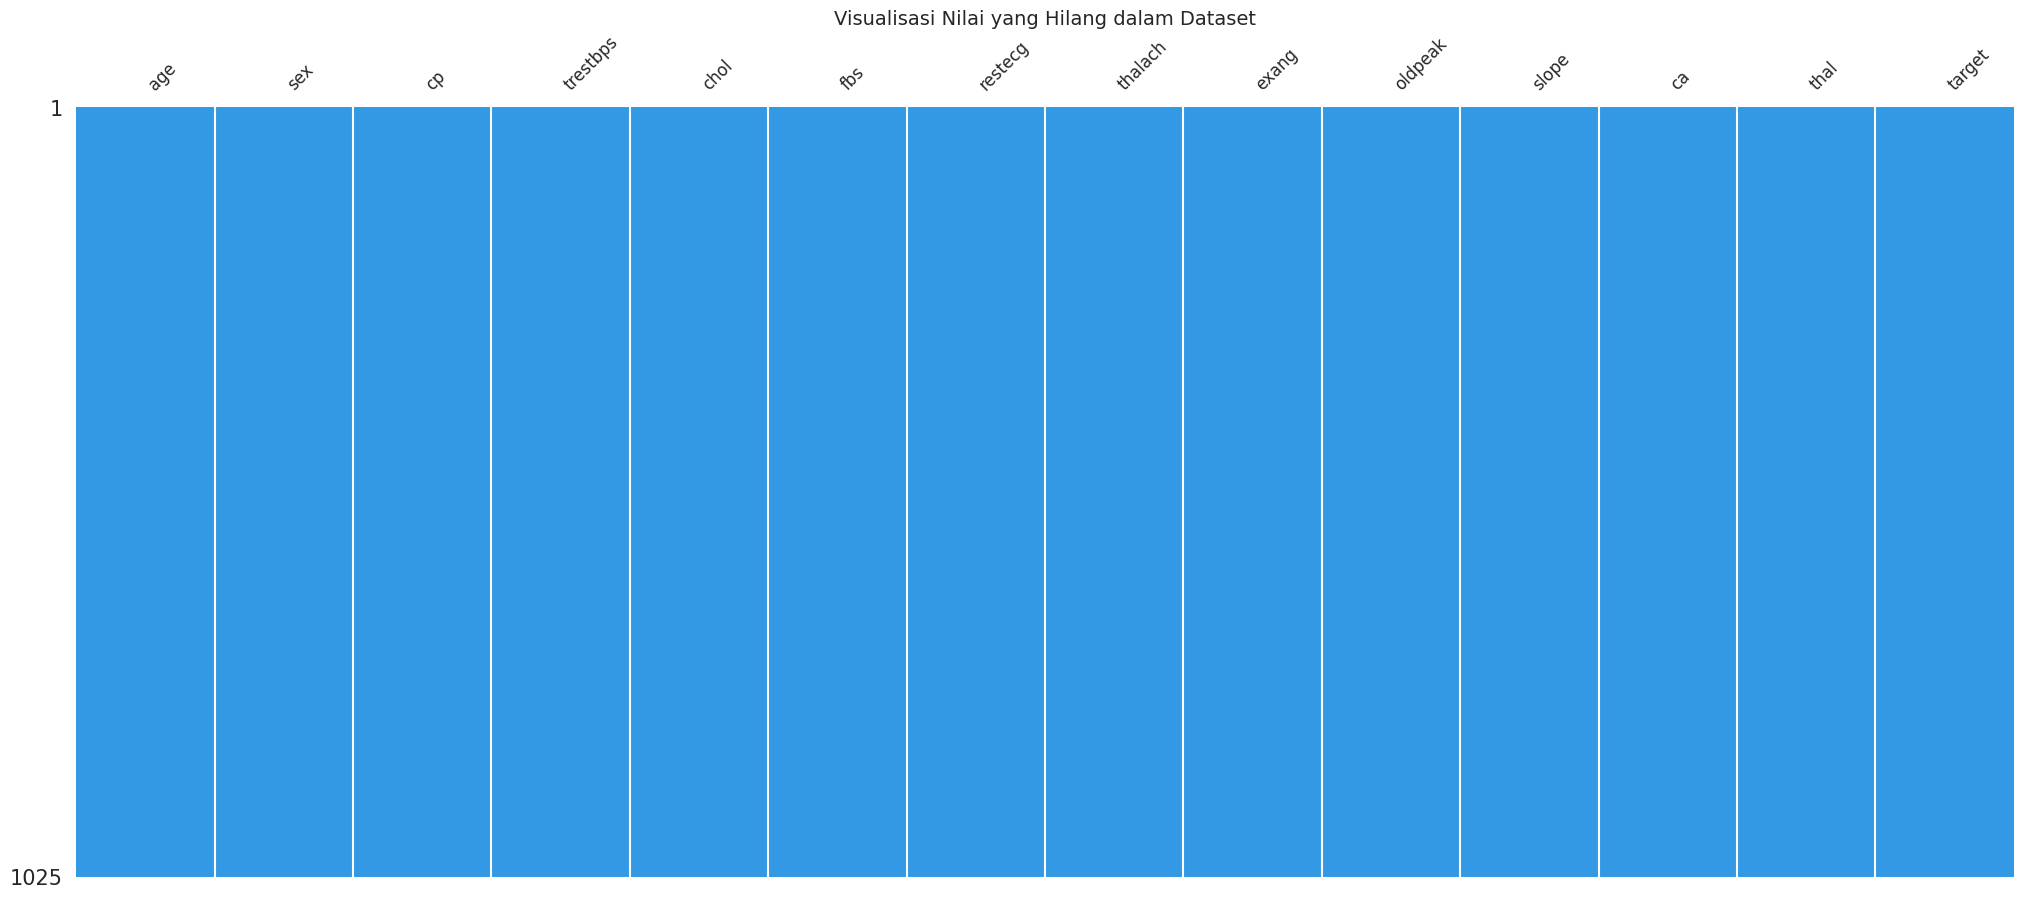

In [96]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))

msno.matrix(
    data,
    color=(0.2, 0.6, 0.9),
    fontsize=12,
    sparkline=False
)

plt.title('Visualisasi Nilai yang Hilang dalam Dataset', fontsize=14)
plt.show()


semua data sudah lengkap isinya

**DATA CLEANING**



MENGATASI DATA OUTLIER:

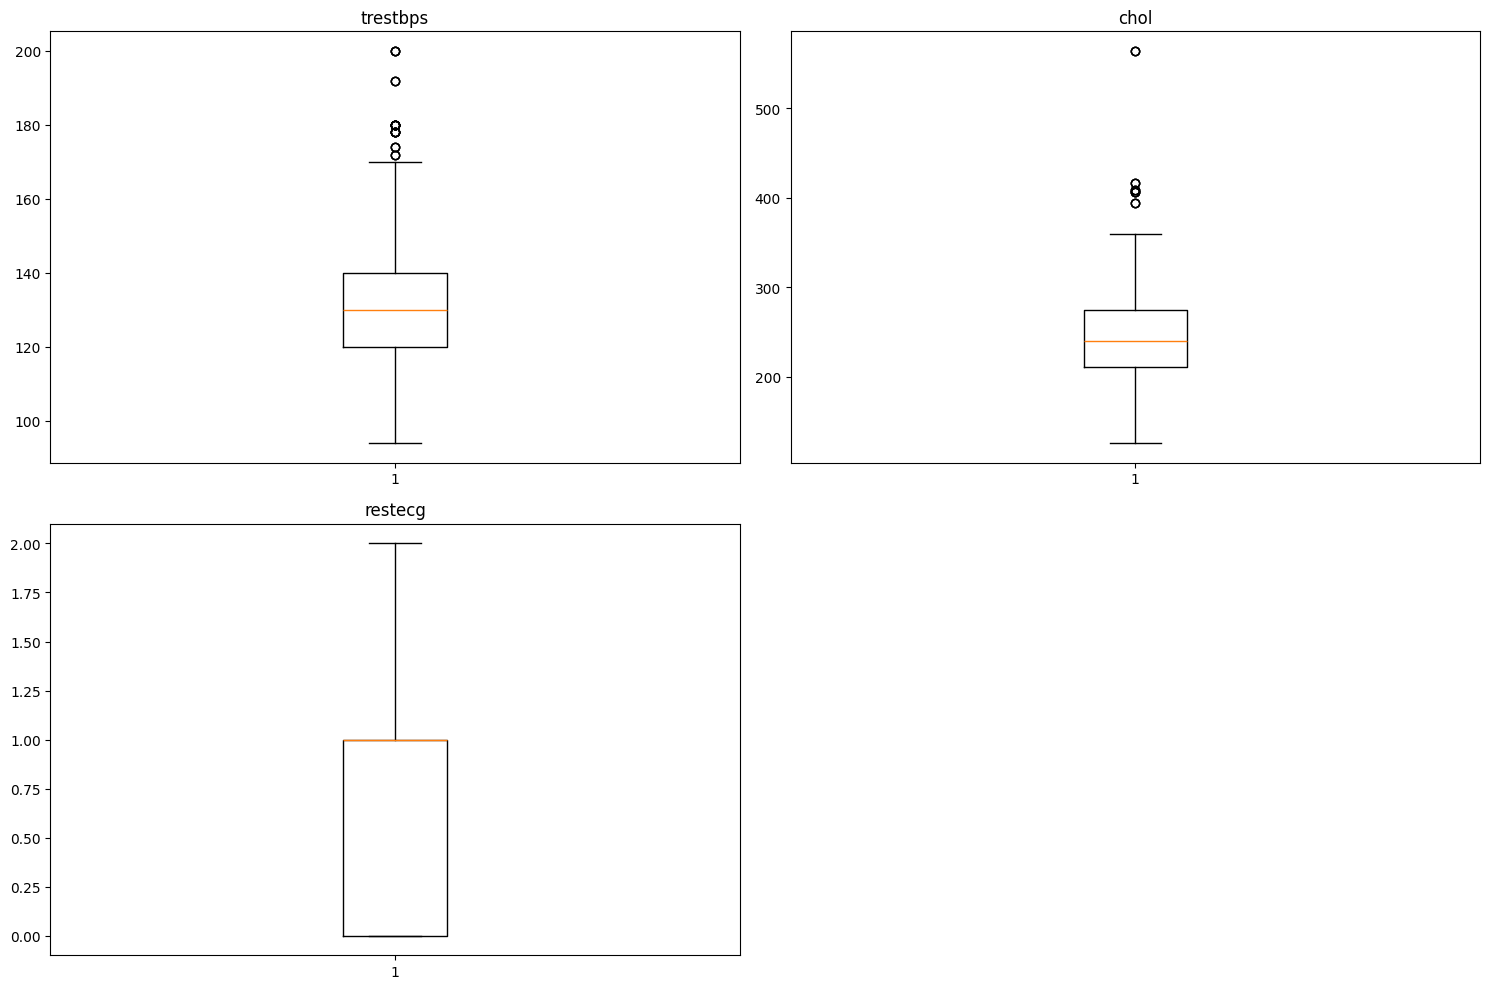

In [97]:
plt.figure(figsize=(15, 10))
plt.style.use('default')  # atau 'classic'

ax = plt.subplot(221)
plt.boxplot(data['trestbps'])
ax.set_title('trestbps')

ax = plt.subplot(222)
plt.boxplot(data['chol'])
ax.set_title('chol')

ax = plt.subplot(223)
plt.boxplot(data['restecg'])
ax.set_title('restecg')

plt.tight_layout()
plt.show()


mengganti nilai outlier dengan nilai batas atas/bawah(trestbps&chol)

In [98]:
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Batas bawah:{lower_bound}')
print(f'Batas atas: {upper_bound}')
data['trestbps'] = np.where(data['trestbps'] < lower_bound, lower_bound, data['trestbps'])
data['trestbps'] = np.where(data['trestbps'] > upper_bound, upper_bound, data['trestbps'])

Batas bawah:90.0
Batas atas: 170.0


In [99]:
Q1 = data['chol'].quantile(0.25)
Q3 = data['chol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Batas bawah: {lower_bound}')
print(f'Batas atas: {upper_bound}')

data['chol'] = np.where(data['chol'] < lower_bound, lower_bound, data['chol'])
data['chol'] = np.where(data['chol'] > upper_bound, upper_bound, data['chol'])

Batas bawah: 115.0
Batas atas: 371.0


Text(0.5, 1.0, 'restecg')

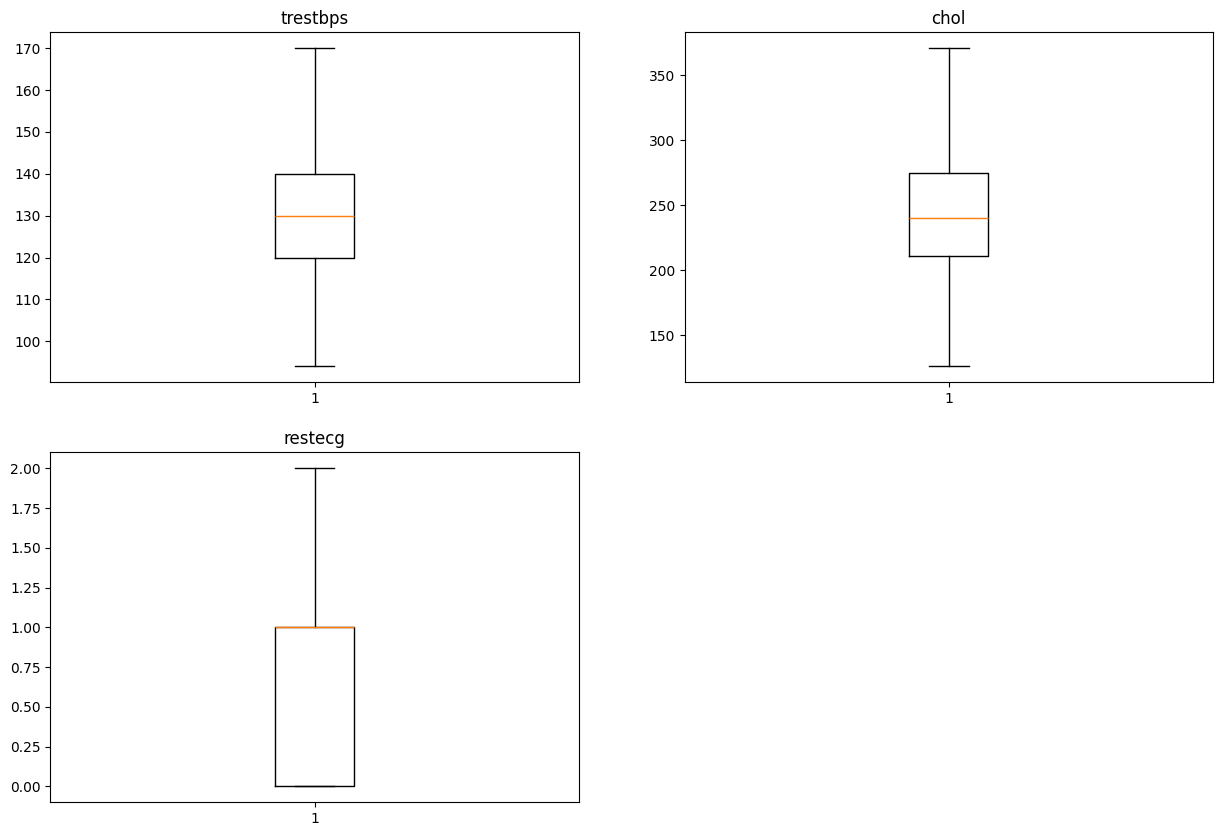

In [100]:
plt.figure(figsize = (15, 10))
plt.style.use('default')
ax=plt.subplot(221)
plt.boxplot(data['trestbps'])
ax.set_title('trestbps')
ax=plt.subplot(222)
plt.boxplot(data['chol'])
ax.set_title('chol')
ax=plt.subplot(223)
plt.boxplot(data['restecg'])
ax.set_title('restecg')

Text(0.5, 1.0, 'oldpeak')

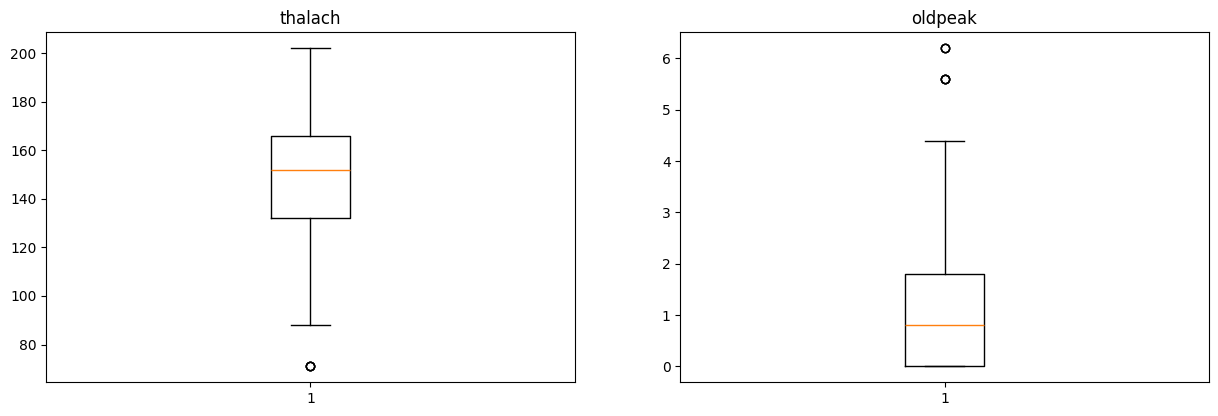

In [101]:
plt.figure(figsize = (15, 10))
plt.style.use('default')
ax=plt.subplot(221)
plt.boxplot(data['thalach'])
ax.set_title('thalach')
ax=plt.subplot(222)
plt.boxplot(data['oldpeak'])
ax.set_title('oldpeak')

Mengganti nilai outlier dengan batas bawah/atas(oldpeak&thalach)

In [102]:
Q1 = data['oldpeak'].quantile(0.25)
Q3 = data['oldpeak'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Batas bawah: {lower_bound}')
print(f'Batas atas: {upper_bound}')

data['oldpeak'] = np.where(data['oldpeak'] < lower_bound, lower_bound, data['oldpeak'])
data['oldpeak'] = np.where(data['oldpeak'] > upper_bound, upper_bound, data['oldpeak'])

Batas bawah: -2.7
Batas atas: 4.5


In [103]:
Q1 = data['thalach'].quantile(0.25)
Q3 = data['thalach'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Batas bawah: {lower_bound}')
print(f'Batas atas: {upper_bound}')

data['thalach'] = np.where(data['thalach'] < lower_bound, lower_bound, data['thalach'])
data['thalach'] = np.where(data['thalach'] > upper_bound, upper_bound, data['thalach'])

Batas bawah: 81.0
Batas atas: 217.0


Text(0.5, 1.0, 'oldpeak')

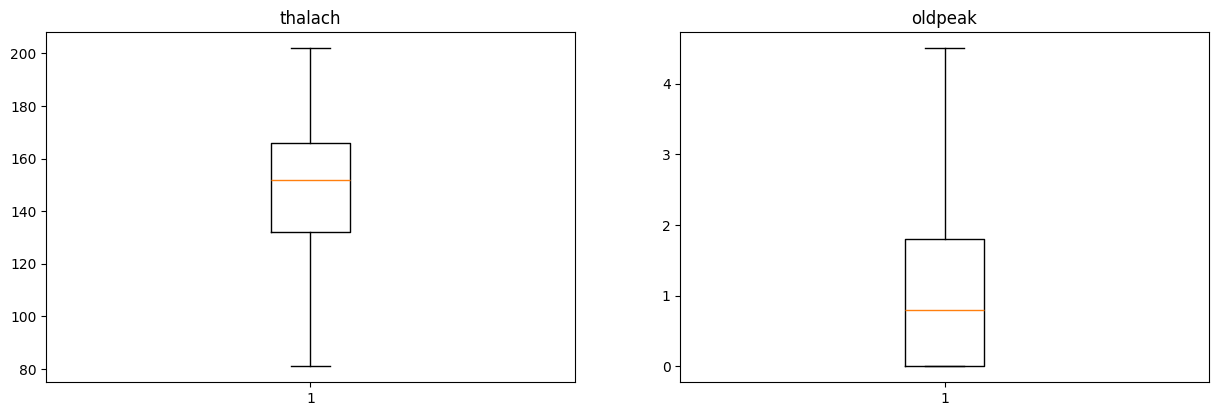

In [104]:
plt.figure(figsize = (15, 10))
plt.style.use('default')
ax=plt.subplot(221)
plt.boxplot(data['thalach'])
ax.set_title('thalach')
ax=plt.subplot(222)
plt.boxplot(data['oldpeak'])
ax.set_title('oldpeak')

**VISUALISASI DATASET**

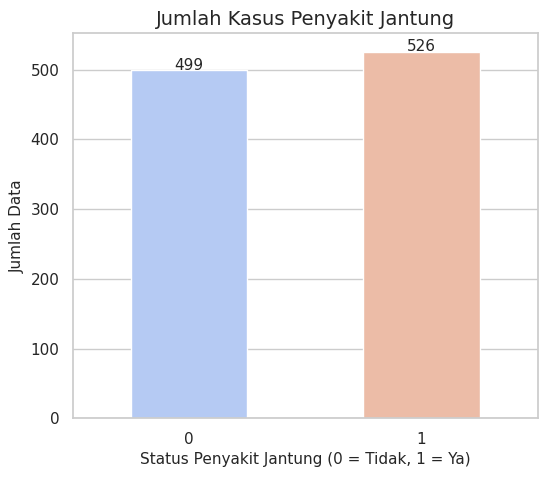

In [105]:


sns.set(style="whitegrid")

plt.figure(figsize=(6,5))
ax = sns.countplot(x="target", data=data, hue="target", palette="coolwarm", width=0.5, legend=False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1,
            int(p.get_height()), ha='center', fontsize=11)

plt.title("Jumlah Kasus Penyakit Jantung", fontsize=14)
plt.xlabel("Status Penyakit Jantung (0 = Tidak, 1 = Ya)", fontsize=11)
plt.ylabel("Jumlah Data", fontsize=11)
plt.show()


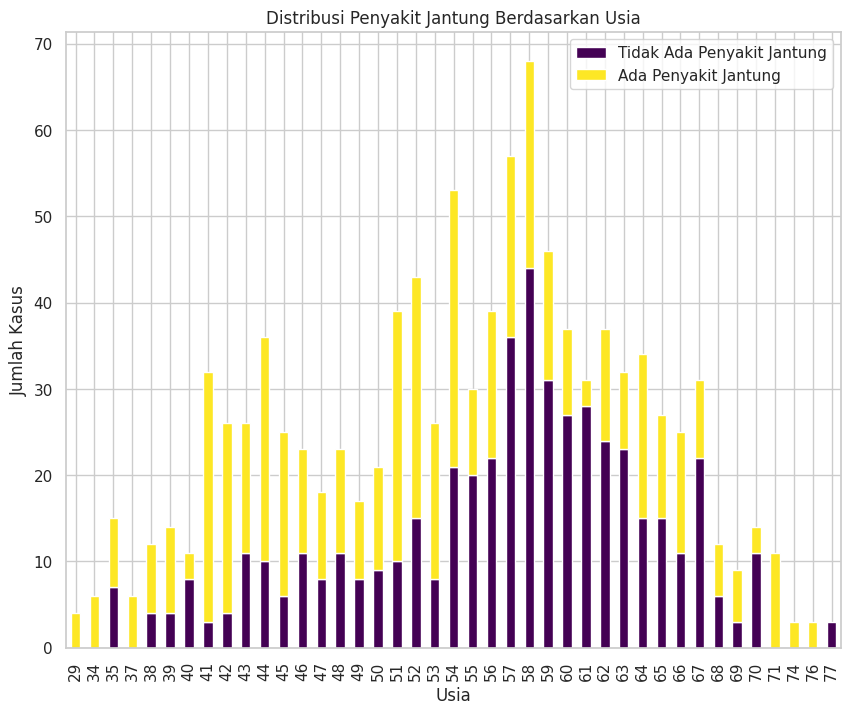

In [106]:
pd.crosstab(data.age, data.target).plot(kind='bar', stacked=True, figsize=(10,8), colormap='viridis')
plt.title('Distribusi Penyakit Jantung Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Kasus')
plt.legend(['Tidak Ada Penyakit Jantung', 'Ada Penyakit Jantung'])
plt.show()



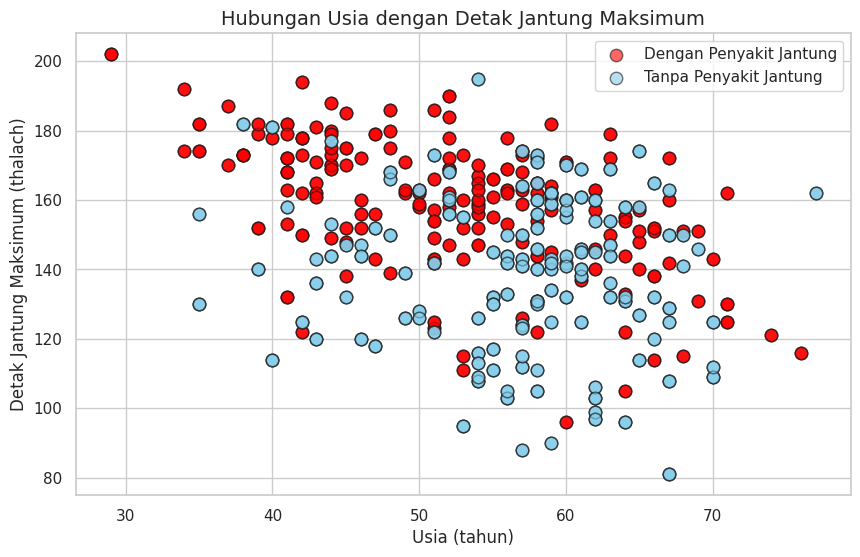

In [107]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

plt.scatter(
    x=data.age[data.target==1],
    y=data.thalach[data.target==1],
    c="red",
    alpha=0.6,
    edgecolors='k',
    s=80,
    label="Dengan Penyakit Jantung"
)

plt.scatter(
    x=data.age[data.target==0],
    y=data.thalach[data.target==0],
    c="skyblue",
    alpha=0.6,
    edgecolors='k',
    s=80,
    label="Tanpa Penyakit Jantung"
)

plt.title("Hubungan Usia dengan Detak Jantung Maksimum", fontsize=14)
plt.xlabel("Usia (tahun)", fontsize=12)
plt.ylabel("Detak Jantung Maksimum (thalach)", fontsize=12)
plt.legend()
plt.show()

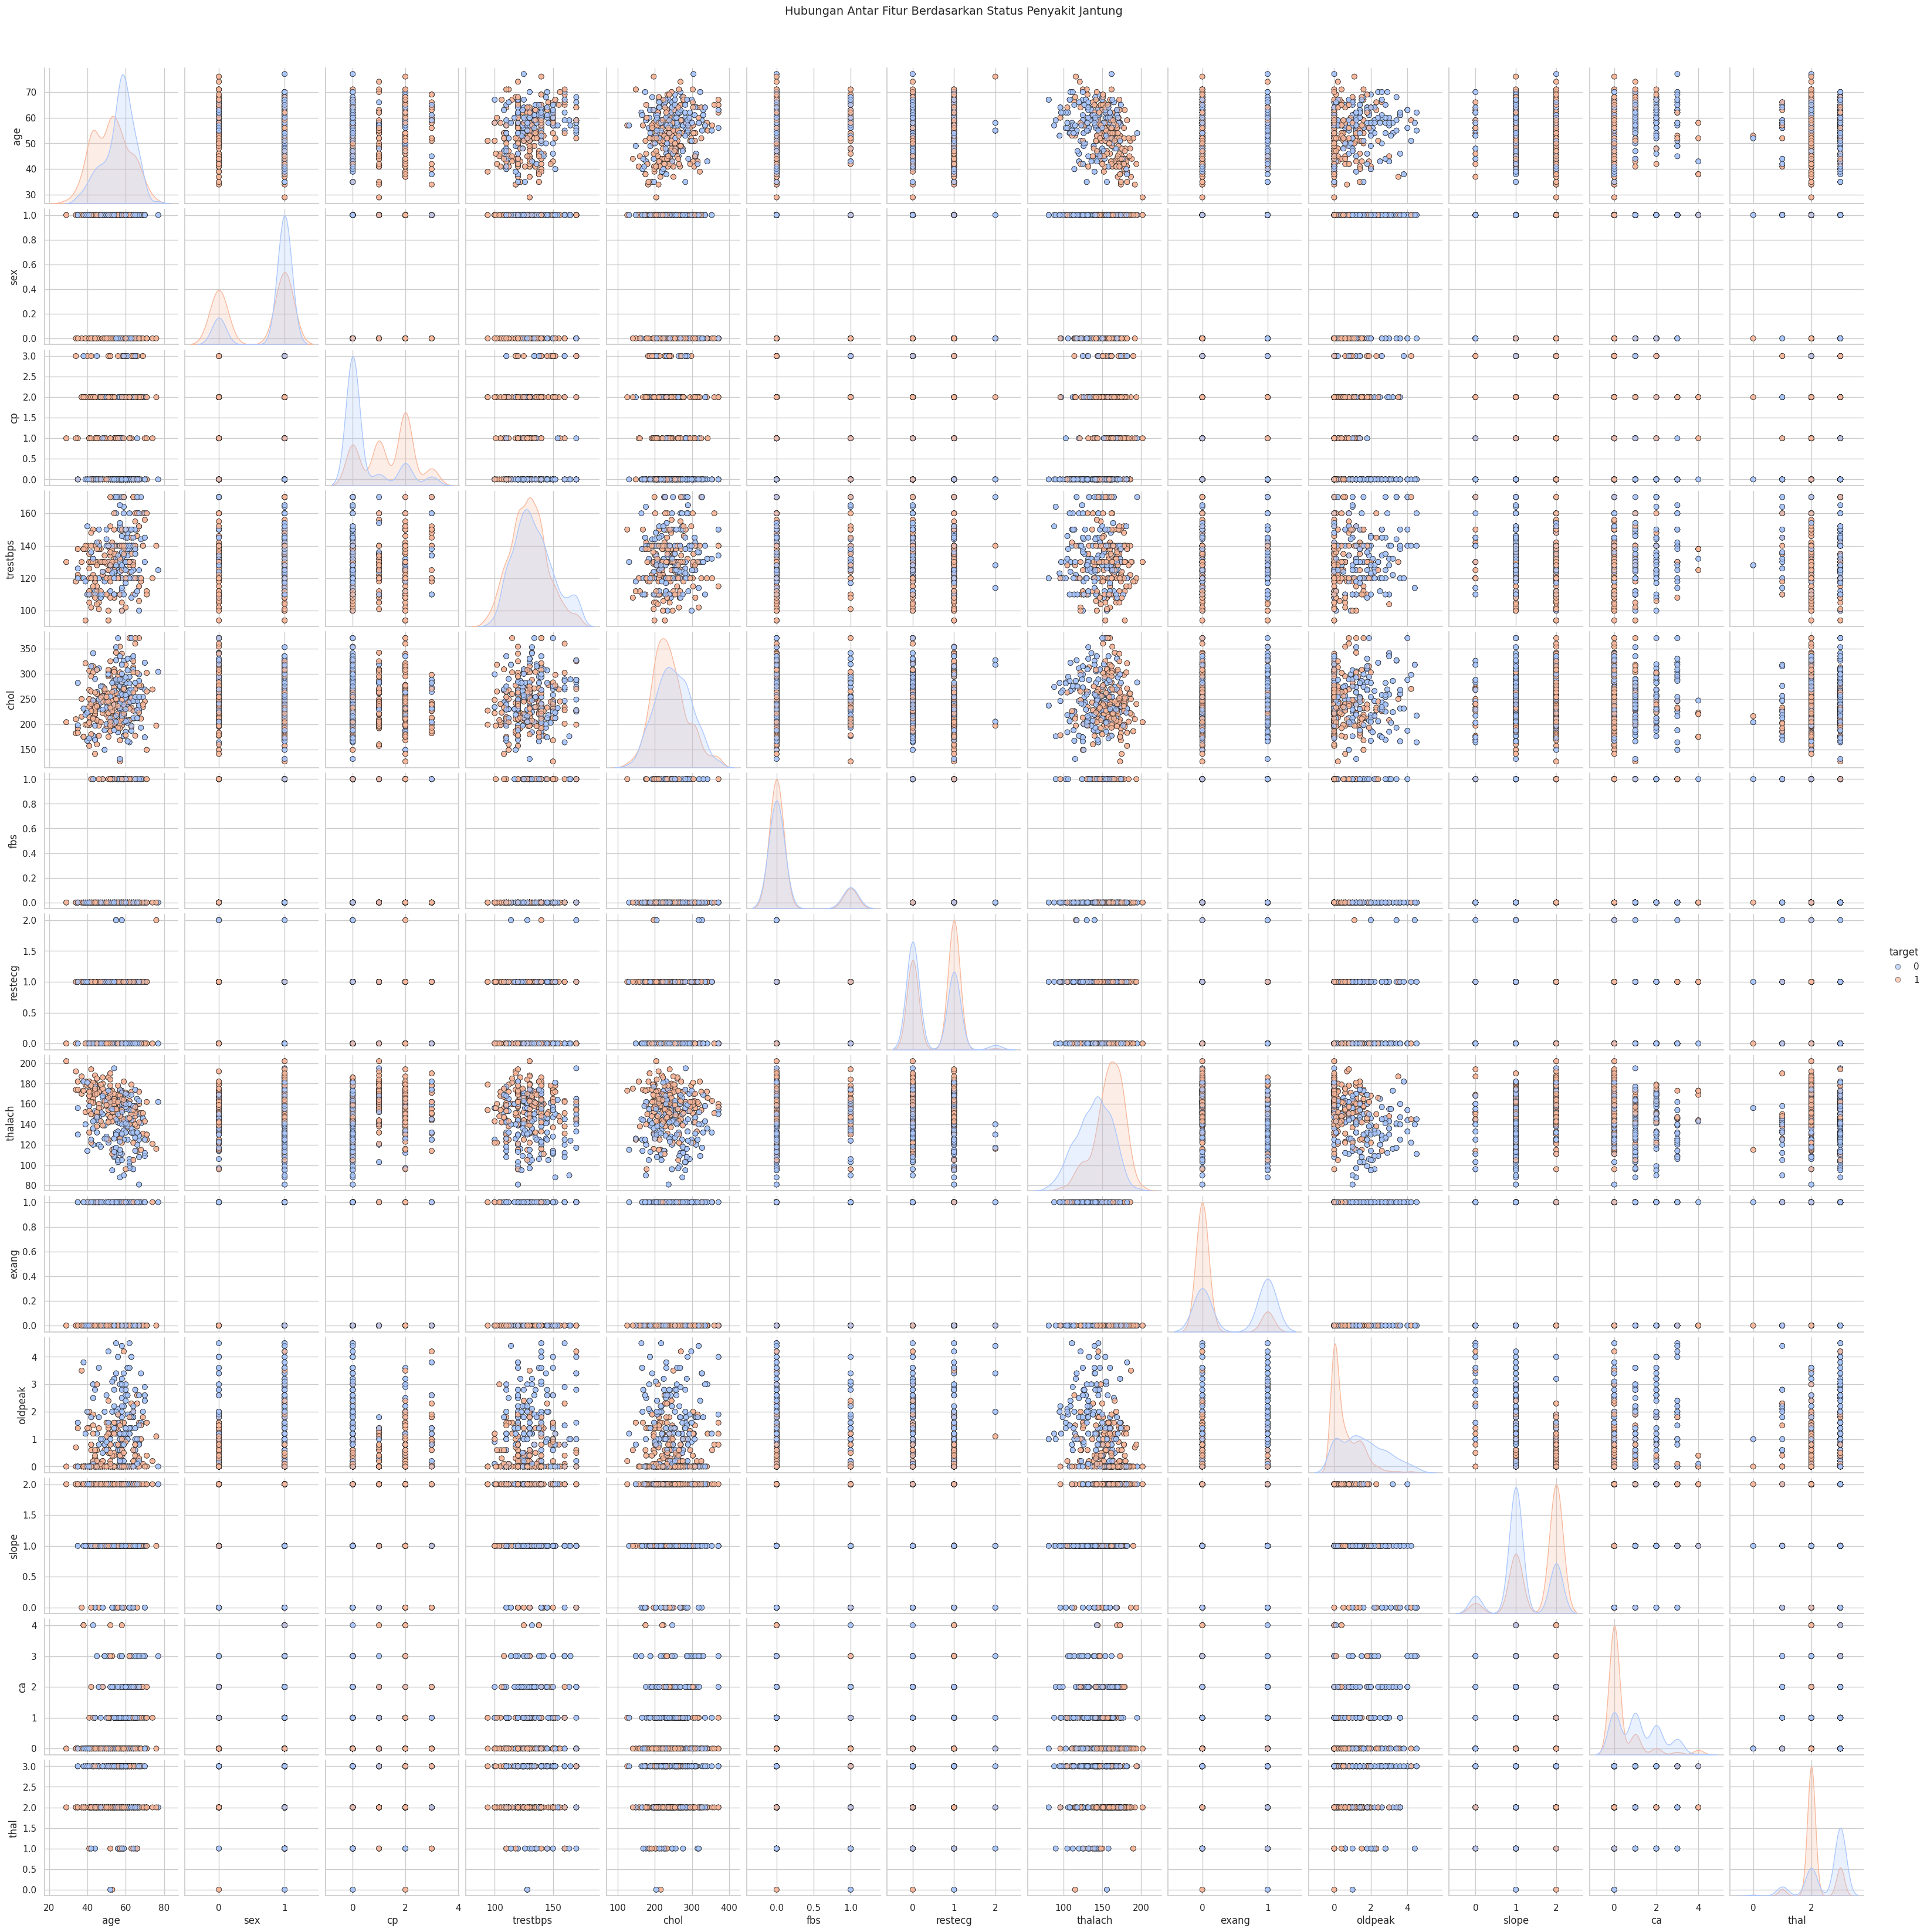

In [108]:


sns.set(style="whitegrid")

sns.pairplot(
    data,
    hue="target",
    diag_kind="kde",
    palette="coolwarm",
    plot_kws={"alpha":0.7, "s":40, "edgecolor":"k"}
)

plt.suptitle("Hubungan Antar Fitur Berdasarkan Status Penyakit Jantung", y=1.02, fontsize=14)
plt.show()


##split dataset Variable X dan Y

In [109]:
x = data.drop(columns='target')
y = data['target']

print(x)
print(y)

      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0     125.0  212.0    0        1    168.0      0      1.0   
1      53    1   0     140.0  203.0    1        0    155.0      1      3.1   
2      70    1   0     145.0  174.0    0        1    125.0      1      2.6   
3      61    1   0     148.0  203.0    0        1    161.0      0      0.0   
4      62    0   0     138.0  294.0    1        1    106.0      0      1.9   
...   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
1020   59    1   1     140.0  221.0    0        1    164.0      1      0.0   
1021   60    1   0     125.0  258.0    0        0    141.0      1      2.8   
1022   47    1   0     110.0  275.0    0        0    118.0      1      1.0   
1023   50    0   0     110.0  254.0    0        0    159.0      0      0.0   
1024   54    1   0     120.0  188.0    0        1    113.0      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0

x berisi semua fitur yang digunakan sebagai input untuk model pasien yang terkena penyakit jantung.

y akan berisi target yang ingin kita prediksi.

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [111]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(820, 13)
(820,)
(205, 13)
(205,)


x_train: Fitur untuk pelatihan.

x_test: Fitur untuk pengujian.

y_train: Target untuk pelatihan.

y_test: Target untuk pengujian.

mencetak bentuk x_train menunjukkan jumlah sampel dan fitur dalam set pelatihan.

mencetak bentuk y_train menunjukkan jumlah sampel dalam target pelatihan.

##Modeling Data Menggunakan Metode Naive Bayes

In [112]:
naiveB = GaussianNB()
naiveB.fit(x_train, y_train)

GaussianNB()

Data testing

In [113]:
y_pred_naiveB = naiveB.predict(x_test)
accuracy_naiveB1 = accuracy_score(y_test, y_pred_naiveB) * 100
print("Accuracy score Naive Bayes:", accuracy_naiveB1)
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred_naiveB))

Accuracy score Naive Bayes: 85.36585365853658
Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



Hasil akurasi score data testing adalah 85.36%, yang menunjukkan bahwa model mampu memprediksi dengan tingkat ketepatan yang cukup tinggi dalam mendeteksi penyakit jantung.

Precision: Dari semua prediksi positif penyakit jantung, sekitar 83% di antaranya benar-benar memiliki penyakit jantung.

Recall: Dari seluruh pasien yang benar-benar memiliki penyakit jantung, sekitar 90% berhasil dideteksi oleh model.

F1-Score: Nilai F1-Score sebesar 0.86 menunjukkan keseimbangan yang baik antara precision dan recall, menandakan bahwa model Naive Bayes memiliki performa yang stabil dan cukup andal dalam mengklasifikasikan kondisi pasien.

##Data Training

In [114]:
y_pred_naiveB = naiveB.predict(x_train)
accuracy_naiveB2 = accuracy_score(y_train, y_pred_naiveB) * 100
print("Accuracy score Naive Bayes: ", accuracy_naiveB2)
print("Classification Report Naive Bayes:")
print(classification_report(y_train, y_pred_naiveB))

Accuracy score Naive Bayes:  82.07317073170731
Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       401
           1       0.80      0.86      0.83       419

    accuracy                           0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



Hasil akurasi score data training adalah 82.07%, menunjukkan bahwa model Naive Bayes mampu memprediksi dengan tingkat ketepatan yang cukup baik pada data pelatihan.

Precision: Nilai 0.84 untuk kelas “Normal” dan 0.80 untuk kelas “Penyakit Jantung” menandakan bahwa sebagian besar prediksi positif model cukup akurat, meskipun masih terdapat beberapa kesalahan prediksi.

Recall: Nilai 0.78 untuk kelas “Normal” dan 0.86 untuk kelas “Penyakit Jantung” menunjukkan bahwa model lebih baik dalam mengenali pasien yang benar-benar memiliki penyakit jantung.

F1-Score: Nilai rata-rata 0.82 mengindikasikan keseimbangan yang baik antara precision dan recall secara keseluruhan.

##Modeling Data Menggunakan Decision Tree Classifier

In [115]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

Data Testing

In [116]:
y_pred_decision_tree = decision_tree.predict(x_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree) * 100
print("Accuracy score Decision Tree:", accuracy_decision_tree)
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))

Accuracy score Decision Tree: 100.0
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Hasil akurasi score data testing adalah 100%, yang menunjukkan bahwa model mampu memprediksi seluruh data uji dengan benar.

Precision: Dari semua prediksi positif penyakit jantung, seluruhnya benar-benar memiliki penyakit jantung (tingkat presisi sempurna 1.00).

Recall: Dari semua pasien yang benar-benar memiliki penyakit jantung, seluruhnya berhasil dideteksi oleh model (tingkat recall sempurna 1.00).

F1-Score: Nilai F1-Score sebesar 1.00 menunjukkan keseimbangan sempurna antara precision dan recall, menandakan bahwa model bekerja sangat baik tanpa kesalahan klasifikasi pada data uji.

##Data Training

In [117]:
y_pred_decision_tree = decision_tree.predict(x_train)
accuracy_decision_tree = accuracy_score(y_train, y_pred_decision_tree) * 100
print("Accuracy score Decision Tree:", accuracy_decision_tree)
print("Classification Report Decision Tree:")
print(classification_report(y_train, y_pred_decision_tree))

Accuracy score Decision Tree: 100.0
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       419

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



Hasil akurasi score data training adalah 100%, yang berarti model Decision Tree mampu mengklasifikasikan seluruh data pelatihan dengan benar tanpa kesalahan.

Precision: Nilai 1.00 menunjukkan bahwa semua prediksi positif penyakit jantung oleh model sepenuhnya benar.

Recall: Nilai 1.00 menandakan bahwa model berhasil mendeteksi seluruh pasien yang benar-benar memiliki penyakit jantung.

F1-Score: Dengan nilai 1.00, model menunjukkan keseimbangan sempurna antara precision dan recall.
Namun, hasil sempurna ini juga dapat mengindikasikan bahwa model mengalami overfitting, yaitu terlalu menyesuaikan diri dengan data training sehingga mungkin tidak seakurat itu saat diuji pada data baru.

##Prediksi Penyakit Jantung menggunakan Naive Bayes

Data Pasien 1

input data berdasarkan umur, gender, tekanan darah, kolestrol, dll.

0 : Normal

1 : Terkena Penyakit

In [118]:
import numpy as np
import pandas as pd

input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_df = pd.DataFrame([input_data], columns=columns)

prediction = naiveB.predict(input_df)

print("Prediksi model:", prediction[0])

if prediction[0] == 0:
    print("Hasil: Normal")
else:
    print("Hasil: Terkena Penyakit Jantung")


Prediksi model: 0
Hasil: Normal


Data Pasien 2

In [119]:
import numpy as np
import pandas as pd

input_data = (58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_df = pd.DataFrame([input_data], columns=columns)

prediction = naiveB.predict(input_df)

print("Prediksi model:", prediction[0])

if prediction[0] == 0:
    print("Hasil: Normal")
else:
    print("Hasil: Terkena Penyakit Jantung")


Prediksi model: 1
Hasil: Terkena Penyakit Jantung


##Prediksi Penyakit Jantung menggunakan Decision Tree Classifier

Data Pasien 1

In [120]:

input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3)
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_df = pd.DataFrame([input_data], columns=columns)

prediction = decision_tree.predict(input_df)
print("Prediksi:", prediction)

if prediction[0] == 0:
    print("Normal")
else:
    print("Terkena Penyakit Jantung")

Prediksi: [0]
Normal


Data Pasien 2

In [121]:
import numpy as np
import pandas as pd

input_data = (58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_df = pd.DataFrame([input_data], columns=columns)

prediction = decision_tree.predict(input_df)

print("Prediksi model:", prediction)

if prediction[0] == 0:
    print("Normal")
else:
    print("Terkena Penyakit Jantung")


Prediksi model: [1]
Terkena Penyakit Jantung
